In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./data-p3/dat_F_sub.csv')

# Convert certain columns to the correct data types if they were read incorrectly
# For instance, if "Sch_Departure" and "Act_Departure" represent timestamps, we can parse them as such
df["Sch_Departure"] = pd.to_datetime(df["Sch_Departure"], errors='coerce')
df["Act_Departure"] = pd.to_datetime(df["Act_Departure"], errors='coerce')

# 1. Display basic information about the data
print("Basic Info:\n", df.info())
print("\nFirst few rows:\n", df.head())

# 2. Show summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())

# 3. Check for missing values in each column
print("\nMissing Values:\n", df.isnull().sum())

# 4. Unique values and common statistics
# For categorical columns, check the distribution
categorical_columns = ["Airfield", "Time_of_Day", "Period_of_Week", "Day_of_Week", 
                    "Month", "Season", "Year", "mode_BFO_Dest_City", "mode_BFO_Dest_Country_Code"]

for column in categorical_columns:
    print(f"\nValue Counts for {column}:\n", df[column].value_counts())

# 5. Summarize specific columns
# Delay statistics
print("\nDelay in Seconds Statistics:\n", df["Delay_in_Seconds"].describe())

# Total passengers summary
print("\nTotal Passengers Statistics:\n", df["tot_pass"].describe())

# 7. Advanced aggregations
# Average delay by Year and Month
delay_by_month_year = df.groupby(["Year", "Month"])["Delay_in_Seconds"].mean()
print("\nAverage Delay by Year and Month:\n", delay_by_month_year)

# Total number of flights by Day of Week
flights_by_day = df["Day_of_Week"].value_counts()
print("\nNumber of Flights by Day of Week:\n", flights_by_day)

# Total passengers by season
passengers_by_season = df.groupby("Season")["tot_pass"].sum()
print("\nTotal Passengers by Season:\n", passengers_by_season)

# 8. Example calculation for mean, median, and mode in specific columns if needed
# E.g., Mean number of destinations and sum of city/country modes
print("\nMean of N_of_Dest_City:\n", df["N_of_Dest_City"].mean())
print("Sum of sum_city_mode:\n", df["sum_city_mode"].sum())
print("Sum of sum_country_mode:\n", df["sum_country_mode"].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  3584 non-null   int64         
 1   Airfield                    3584 non-null   object        
 2   Flight_ID                   3584 non-null   int64         
 3   Sch_Departure               3584 non-null   datetime64[ns]
 4   Act_Departure               3584 non-null   datetime64[ns]
 5   Time_of_Day                 3584 non-null   object        
 6   Period_of_Week              3584 non-null   object        
 7   Day_of_Week                 3584 non-null   object        
 8   Month                       3584 non-null   object        
 9   Season                      3584 non-null   object        
 10  Year                        3584 non-null   int64         
 11  tot_pass                    3584 non-null   int64       

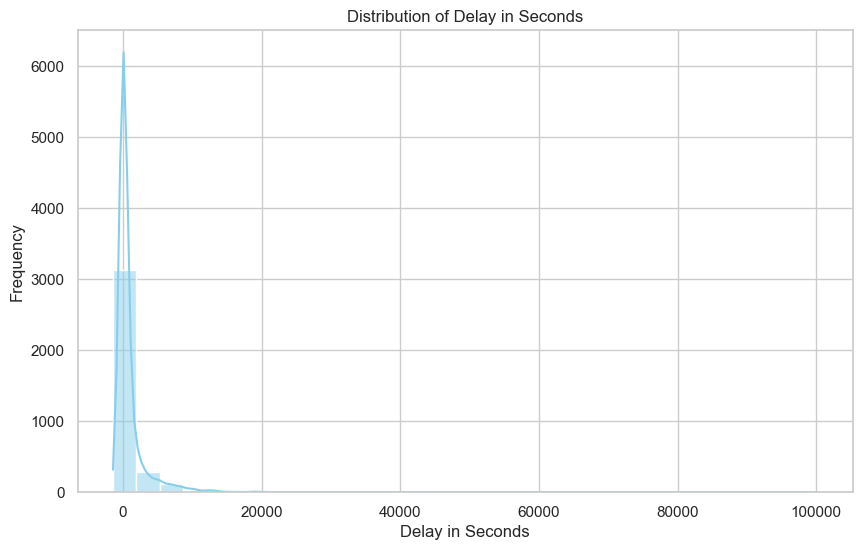

/var/folders/c9/1d046q6x23g7cr61h_fz6pq80000gn/T/ipykernel_11690/105635971.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Day_of_Week", y="Delay_in_Seconds", data=df, estimator="mean", ci=None, palette="viridis")
/var/folders/c9/1d046q6x23g7cr61h_fz6pq80000gn/T/ipykernel_11690/105635971.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Day_of_Week", y="Delay_in_Seconds", data=df, estimator="mean", ci=None, palette="viridis")


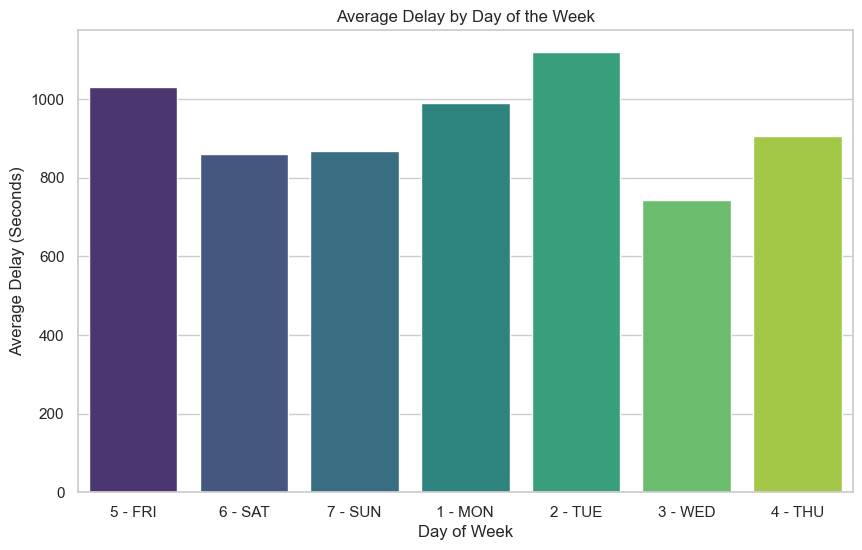

/var/folders/c9/1d046q6x23g7cr61h_fz6pq80000gn/T/ipykernel_11690/105635971.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Time_of_Day", y="Delay_in_Seconds", data=df, estimator="mean", ci=None, palette="coolwarm")
/var/folders/c9/1d046q6x23g7cr61h_fz6pq80000gn/T/ipykernel_11690/105635971.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Time_of_Day", y="Delay_in_Seconds", data=df, estimator="mean", ci=None, palette="coolwarm")


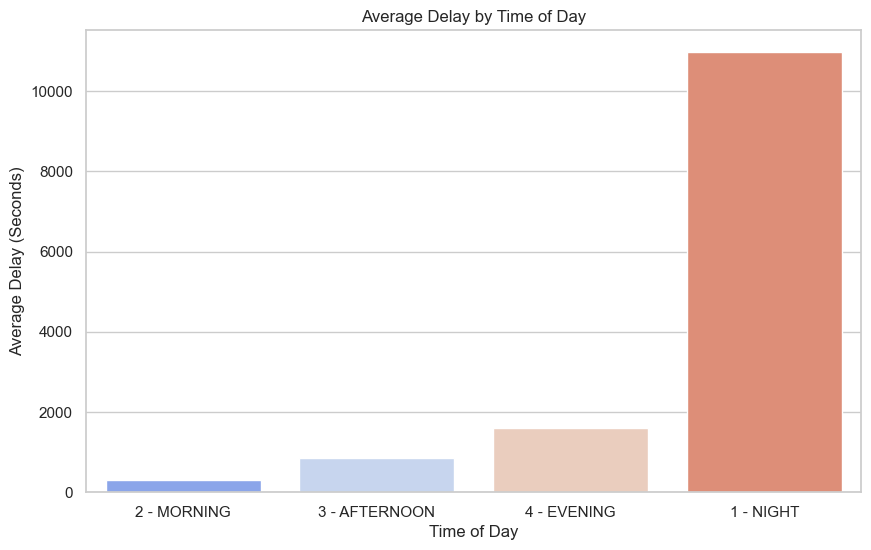

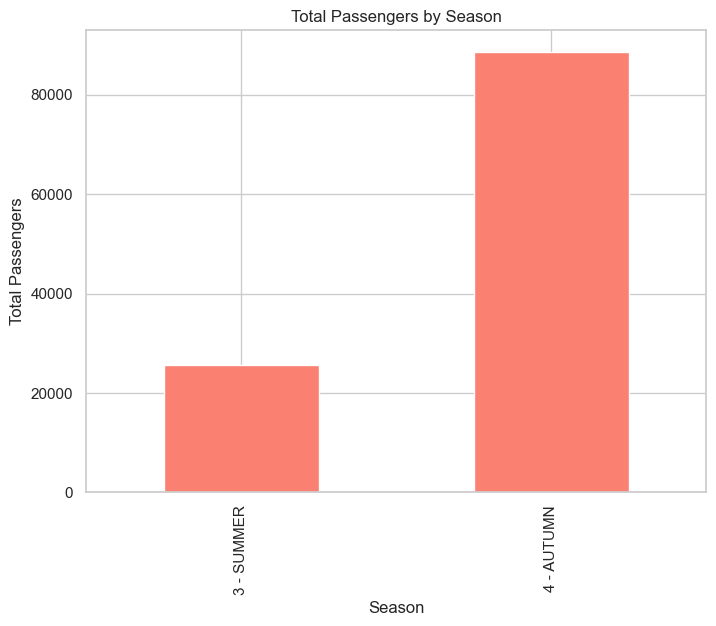

/var/folders/c9/1d046q6x23g7cr61h_fz6pq80000gn/T/ipykernel_11690/105635971.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Day_of_Week", data=df, palette="muted")


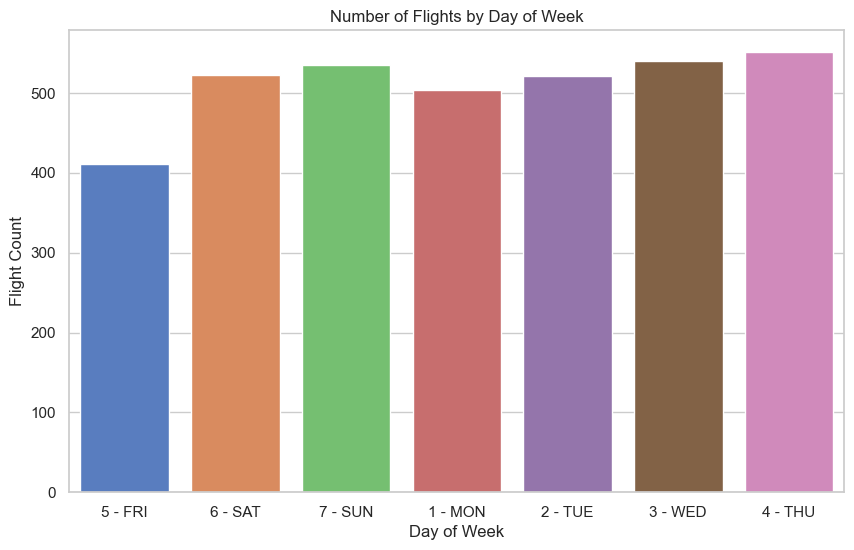

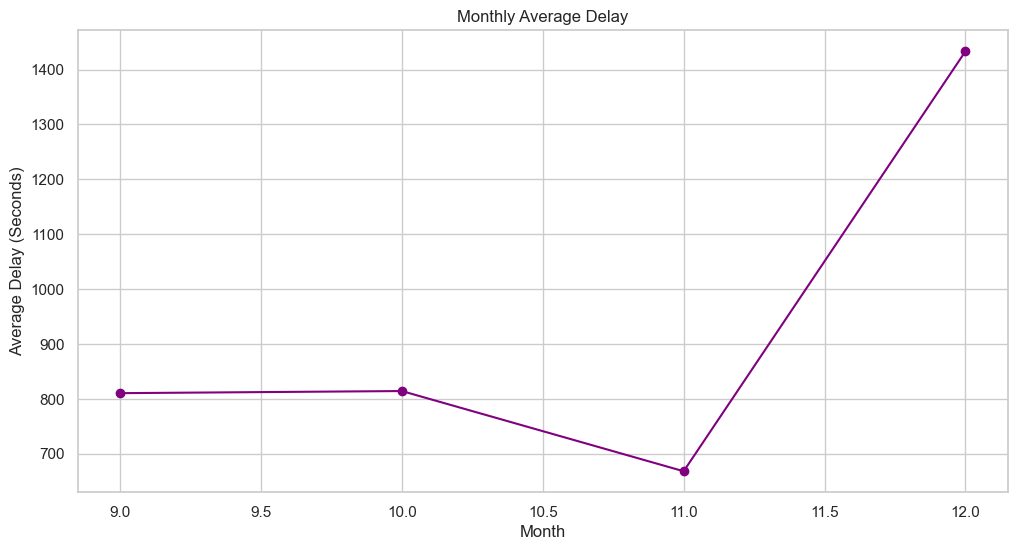

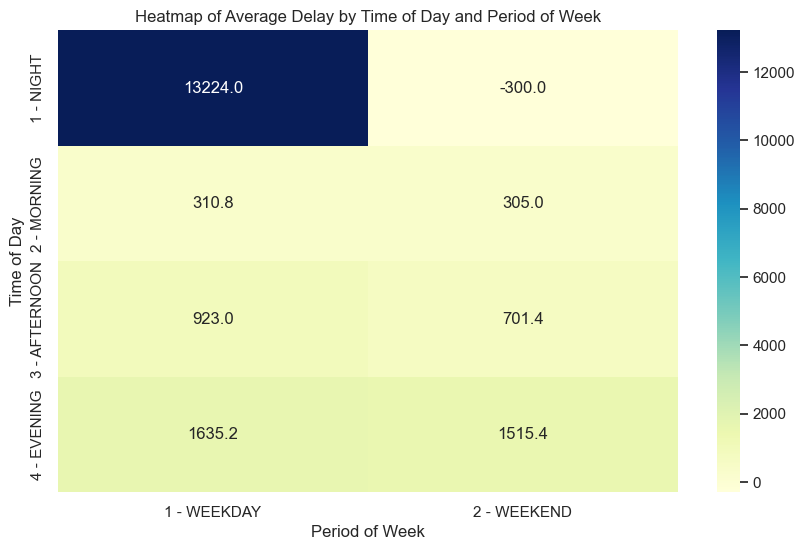

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert "Sch_Departure" and "Act_Departure" to datetime if necessary
df["Sch_Departure"] = pd.to_datetime(df["Sch_Departure"], errors='coerce')
df["Act_Departure"] = pd.to_datetime(df["Act_Departure"], errors='coerce')

# Set style for seaborn
sns.set(style="whitegrid")

# 1. Delay Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Delay_in_Seconds"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Delay in Seconds")
plt.xlabel("Delay in Seconds")
plt.ylabel("Frequency")
plt.show()

# 2. Average Delay by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x="Day_of_Week", y="Delay_in_Seconds", data=df, estimator="mean", ci=None, palette="viridis")
plt.title("Average Delay by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Delay (Seconds)")
plt.show()

# 3. Average Delay by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(x="Time_of_Day", y="Delay_in_Seconds", data=df, estimator="mean", ci=None, palette="coolwarm")
plt.title("Average Delay by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Delay (Seconds)")
plt.show()

# 4. Total Passengers by Season
plt.figure(figsize=(8, 6))
passengers_by_season = df.groupby("Season")["tot_pass"].sum().sort_values()
passengers_by_season.plot(kind='bar', color='salmon')
plt.title("Total Passengers by Season")
plt.xlabel("Season")
plt.ylabel("Total Passengers")
plt.show()

# 5. Flight Counts by Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(x="Day_of_Week", data=df, palette="muted")
plt.title("Number of Flights by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Flight Count")
plt.show()

# 6. Monthly Average Delay Trend
plt.figure(figsize=(12, 6))
df['Month'] = pd.to_datetime(df['Month'], format='%m - %b').dt.month  # Convert 'Month' to a month number if necessary
monthly_delay = df.groupby("Month")["Delay_in_Seconds"].mean()
monthly_delay.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Average Delay")
plt.xlabel("Month")
plt.ylabel("Average Delay (Seconds)")
plt.show()

# 7. Heatmap of Delay by Time of Day and Period of Week
plt.figure(figsize=(10, 6))
pivot_table = df.pivot_table(values="Delay_in_Seconds", index="Time_of_Day", columns="Period_of_Week", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap of Average Delay by Time of Day and Period of Week")
plt.xlabel("Period of Week")
plt.ylabel("Time of Day")
plt.show()

In [4]:
delay_stats = df.groupby('Time_of_Day')['Delay_in_Seconds'].describe()
print("Delay statistics by Time_of_Day:")
print(delay_stats)

Delay statistics by Time_of_Day:
                count          mean          std     min      25%      50%  \
Time_of_Day                                                                  
1 - NIGHT         6.0  10970.000000  5850.466648  -300.0  11925.0  12180.0   
2 - MORNING    1222.0    309.230769  1067.004915  -600.0      0.0      0.0   
3 - AFTERNOON  1198.0    858.631052  3847.606223 -1200.0      0.0      0.0   
4 - EVENING    1158.0   1596.373057  3338.367718 -1440.0      0.0    120.0   

                   75%       max  
Time_of_Day                       
1 - NIGHT      12705.0   17040.0  
2 - MORNING        0.0   10800.0  
3 - AFTERNOON    420.0  100200.0  
4 - EVENING     1800.0   45000.0  


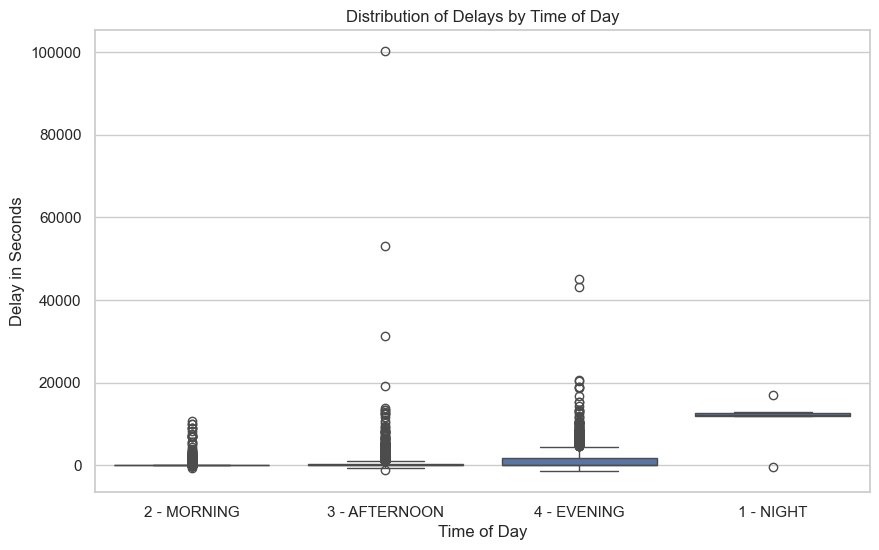

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_of_Day', y='Delay_in_Seconds', data=df)
plt.title("Distribution of Delays by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Delay in Seconds")
plt.show()

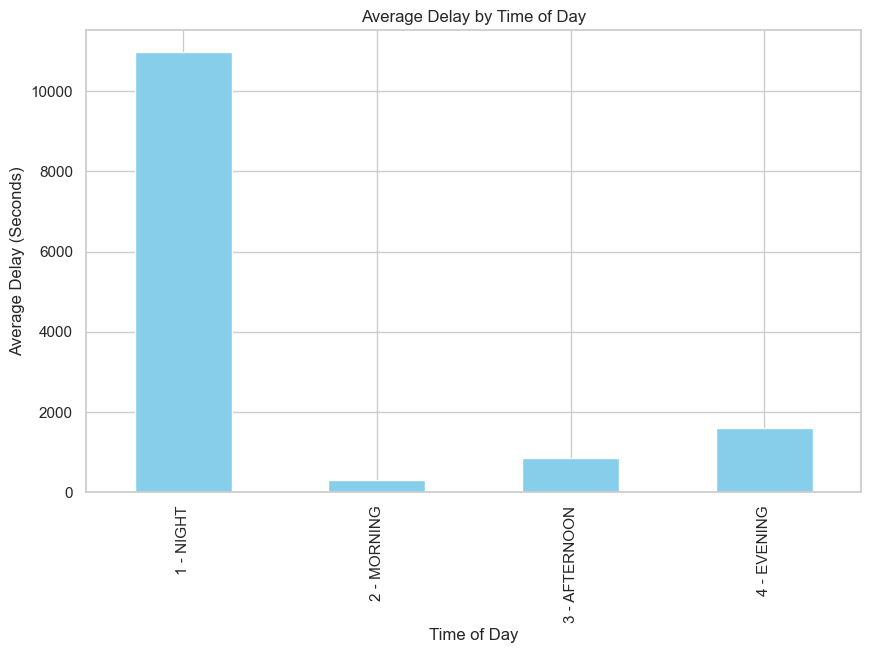

In [7]:
avg_delay = df.groupby('Time_of_Day')['Delay_in_Seconds'].mean()

plt.figure(figsize=(10, 6))
avg_delay.plot(kind='bar', color='skyblue')
plt.title("Average Delay by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Delay (Seconds)")
plt.show()

In [8]:
# Filter data for night flights
night_flights = df[df['Time_of_Day'] == '1 - NIGHT']

In [15]:
night_flights.to_csv('./data-p3/night_flights.csv', index=False)

In [9]:
# Calculate total and average passengers by destination city for night flights
night_city_passengers = night_flights.groupby('mode_BFO_Dest_City')['tot_pass'].agg(['sum', 'mean']).reset_index()
night_city_passengers.columns = ['Destination City', 'Total Passengers', 'Average Passengers']

print("Total and average passengers by destination city for night flights:")
print(night_city_passengers.sort_values(by="Total Passengers", ascending=False))

Total and average passengers by destination city for night flights:
  Destination City  Total Passengers  Average Passengers
1           BORQUE                77               19.25
0           BOR030                 1                1.00
2           VES033                 1                1.00


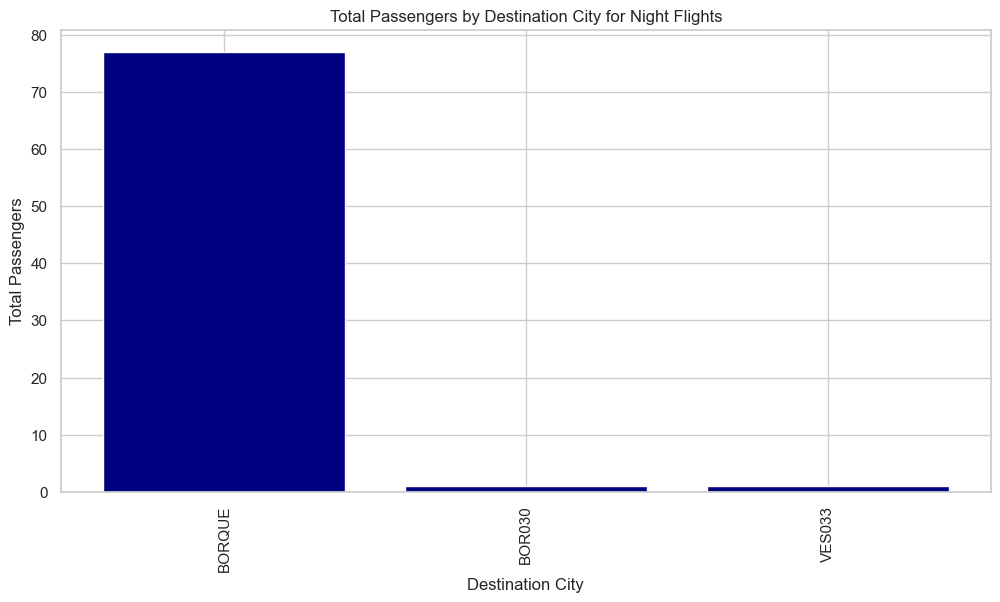

In [10]:
import matplotlib.pyplot as plt

# Sort data for plotting
night_city_passengers = night_city_passengers.sort_values(by='Total Passengers', ascending=False)

# Plot total passengers by destination city for night flights
plt.figure(figsize=(12, 6))
plt.bar(night_city_passengers['Destination City'], night_city_passengers['Total Passengers'], color='navy')
plt.xticks(rotation=90)
plt.title("Total Passengers by Destination City for Night Flights")
plt.xlabel("Destination City")
plt.ylabel("Total Passengers")
plt.show()

In [11]:
# Calculate total and average passengers by destination country for night flights
night_country_passengers = night_flights.groupby('mode_BFO_Dest_Country_Code')['tot_pass'].agg(['sum', 'mean']).reset_index()
night_country_passengers.columns = ['Destination Country', 'Total Passengers', 'Average Passengers']

print("Total and average passengers by destination country for night flights:")
print(night_country_passengers.sort_values(by="Total Passengers", ascending=False))

Total and average passengers by destination country for night flights:
  Destination Country  Total Passengers  Average Passengers
0                 BOR                78                15.6
1                 VES                 1                 1.0


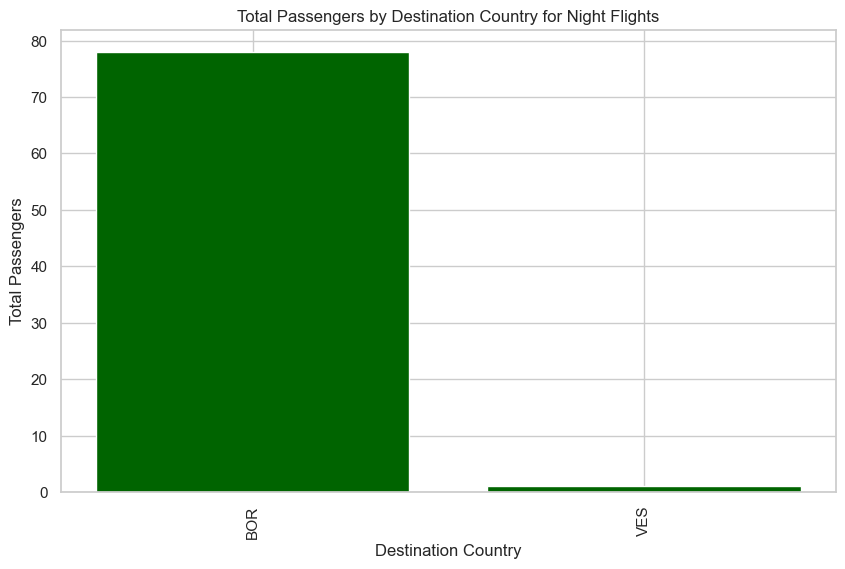

In [12]:
# Sort data for plotting
night_country_passengers = night_country_passengers.sort_values(by='Total Passengers', ascending=False)

# Plot total passengers by destination country for night flights
plt.figure(figsize=(10, 6))
plt.bar(night_country_passengers['Destination Country'], night_country_passengers['Total Passengers'], color='darkgreen')
plt.xticks(rotation=90)
plt.title("Total Passengers by Destination Country for Night Flights")
plt.xlabel("Destination Country")
plt.ylabel("Total Passengers")
plt.show()

# Clustering

In [57]:
import pandas as pd

df = pd.read_csv('./data-p3/dat_F_sub.csv')

# Convert "Sch_Departure" and "Act_Departure" to datetime if necessary
df["Sch_Departure"] = pd.to_datetime(df["Sch_Departure"], errors='coerce')
df["Act_Departure"] = pd.to_datetime(df["Act_Departure"], errors='coerce')

# Columns to one-hot encode
columns_to_encode = ["Airfield", "Time_of_Day", "Period_of_Week", "Day_of_Week", 
                    "Month", "Season", "mode_BFO_Dest_City", "mode_BFO_Dest_Country_Code"]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode, dtype=int)

# Display a sample of the data to verify encoding
print("Encoded Data Sample:\n", df_encoded.head())

Encoded Data Sample:
    Unnamed: 0  Flight_ID                 Sch_Departure  \
0           1      18095 1970-01-01 00:00:01.851408360   
1           2      18096 1970-01-01 00:00:01.851408780   
2           3      18097 1970-01-01 00:00:01.851410760   
3           4      18098 1970-01-01 00:00:01.851411960   
4           5      18099 1970-01-01 00:00:01.851413760   

                  Act_Departure  Year  tot_pass   N  min      mean  median  \
0 1970-01-01 00:00:01.851408360  2028        55  19  2.0  6.157895     7.0   
1 1970-01-01 00:00:01.851408780  2028        38  22  2.0  6.636364     6.0   
2 1970-01-01 00:00:01.851410760  2028        32  26  2.0  4.384615     4.0   
3 1970-01-01 00:00:01.851411960  2028        21  20  4.0  5.550000     5.5   
4 1970-01-01 00:00:01.851413760  2028        57  47  1.0  6.978723     7.0   

   ...  mode_BFO_Dest_City_BORSAF  mode_BFO_Dest_City_NEN003  \
0  ...                          0                          0   
1  ...                          

In [58]:
# Drop rows with any NaN values
df = df.dropna()

# Display the number of rows before and after dropping NaN values
print(f"Original number of rows: {df.shape[0]}")

Original number of rows: 3520


In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply one-hot encoding with 1 and 0 values
columns_to_encode = ["Airfield", "Time_of_Day", "Period_of_Week", "Day_of_Week", 
                    "Month", "Season", "mode_BFO_Dest_City", "mode_BFO_Dest_Country_Code"]
df_encoded = pd.get_dummies(df_encoded, columns=columns_to_encode, dtype=int)

# 1. Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# 2. Use the elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 70)  # Testing k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances to the closest cluster center

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

# 3. Choose an optimal k (e.g., based on the elbow plot, choose k=3 or k=4 as appropriate)
optimal_k = 27  # Replace with the chosen value from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded["Cluster"] = kmeans.fit_predict(df_scaled)

# 4. Analyze cluster assignments
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Assignments:\n", df_encoded["Cluster"].value_counts())

# 5. Optional: Visualize clusters (using PCA for dimensionality reduction to 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_encoded['PCA1'] = df_pca[:, 0]
df_encoded['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_encoded, palette='viridis', s=60)
plt.title("K-Means Clustering with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

KeyError: "None of [Index(['Airfield', 'Time_of_Day', 'Period_of_Week', 'Day_of_Week', 'Month',\n       'Season', 'mode_BFO_Dest_City', 'mode_BFO_Dest_Country_Code'],\n      dtype='object')] are in the [columns]"

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_encoded is your DataFrame with cluster assignments
# Let's describe the clusters
cluster_description = df_encoded.groupby('Cluster').mean()  # Calculate mean of numerical features by cluster
print("Cluster Descriptions:\n", cluster_description)

# Optional: Add count of rows in each cluster
cluster_counts = df_encoded['Cluster'].value_counts()
cluster_description['Count'] = cluster_counts

# Print the updated cluster description with counts
print("\nCluster Descriptions with Counts:\n", cluster_description)

# Graph the distribution of some key numerical features across clusters
features_to_plot = ['tot_pass', 'mean', 'median', 'Delay_in_Seconds']  # You can customize this list

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)  # Create a grid of subplots
    sns.boxplot(x='Cluster', y=feature, data=df_encoded)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

KeyError: 'Cluster'

# Random Forest

In [43]:
import pandas as pd

df = pd.read_csv('./data-p3/dat_F_sub.csv')
# Drop rows with any NaN values
df = df.dropna()

# Convert "Sch_Departure" and "Act_Departure" to datetime if necessary
df["Sch_Departure"] = pd.to_datetime(df["Sch_Departure"], errors='coerce')
df["Act_Departure"] = pd.to_datetime(df["Act_Departure"], errors='coerce')

# Columns to one-hot encode
columns_to_encode = ["Airfield", "Time_of_Day", "Period_of_Week", "Day_of_Week", 
                     "Month", "Season", "mode_BFO_Dest_City", "mode_BFO_Dest_Country_Code"]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode, dtype=int)

# Display a sample of the data to verify encoding
print("Encoded Data Sample:\n", df_encoded.head())

Encoded Data Sample:
    Unnamed: 0  Flight_ID                 Sch_Departure  \
0           1      18095 1970-01-01 00:00:01.851408360   
1           2      18096 1970-01-01 00:00:01.851408780   
2           3      18097 1970-01-01 00:00:01.851410760   
3           4      18098 1970-01-01 00:00:01.851411960   
4           5      18099 1970-01-01 00:00:01.851413760   

                  Act_Departure  Year  tot_pass   N  min      mean  median  \
0 1970-01-01 00:00:01.851408360  2028        55  19  2.0  6.157895     7.0   
1 1970-01-01 00:00:01.851408780  2028        38  22  2.0  6.636364     6.0   
2 1970-01-01 00:00:01.851410760  2028        32  26  2.0  4.384615     4.0   
3 1970-01-01 00:00:01.851411960  2028        21  20  4.0  5.550000     5.5   
4 1970-01-01 00:00:01.851413760  2028        57  47  1.0  6.978723     7.0   

   ...  mode_BFO_Dest_City_BORSAF  mode_BFO_Dest_City_NEN003  \
0  ...                          0                          0   
1  ...                          

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Assuming df_encoded is your preprocessed DataFrame with features and target
# Replace 'target_column' with the name of your target variable
target_column = 'Delay_in_Seconds'  # Example target column
features = df_encoded.drop(columns=[target_column])  # Drop the target column from features
target = df_encoded[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)